In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
from collections import deque

In [2]:
# tv maze show search base url (this is to search for individual shows)
base_url = "http://api.tvmaze.com/search/shows?q="

In [ ]:
# Question 1
#Which Network, on average, have the highest TV show rating?

#calc random page numbers as sample



#URL for all primary information for every show in the database

q1URL = "http://api.tvmaze.com/shows?page="
#TO DO: Make the page numbers randomly generated?
pages = ["0","1","2","3","4","5","6", "7", "8", "9"]
recordnum=1

networks = []
ratings= []
ids=[]
listlength = len(ids)

print("starting pull")

#this pulls every ID from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for x in response:
        ids.append(x['id'])
print(f"ids done")

#this pulls every rating average from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings.append(i['rating']['average'])
        
print(f"ratings done")

for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for w in response:
        try:
            networks.append(w['network']['name'])
        except:
            networks.append("Null")

print(f"networks done")
print("pull completed")
print("Length check:")
print(len(networks))
print(len(ids))
print(len(ratings))
#double check that every thing lines up in the API call after you visualize
    
    
#maybe not needed but keeping code just in case:   
#associating IDs which are the only unique value in the API with network names and ratings so that we could merge the dictionaries later?    
#zip_it1 = zip(ids, networks)
#zip_it2 = zip(ids, ratings)
#dictionary1 = dict(zip_it1)
#dictionary2 = dict(zip_it2) 
   

In [17]:
#Question 1
#create df 
quest1df = pd.DataFrame({'IDs': ids, "Networks": "", "Ratings": ratings})
quest1df.head(50)


,IDs,Networks,Ratings
0,1,,6.5
1,2,,8.9
2,3,,7.5
3,4,,7.4
4,5,,8.3
5,6,,7.7
6,7,,8.2
7,8,,6.8
8,9,,7.8
9,10,,8.5


In [ ]:
#need graphs

# Question 2

In [5]:
#Question 2
#Which TV Shows are the most popular?



#calc random page numbers as sample



#URL for all primary information for every show in the database

q1URL = "http://api.tvmaze.com/shows?page="
#TO DO: Make the page numbers randomly generated?
pages = ["0","1","2","3","4","5","6", "7", "8", "9"]


shows = []
ratings2 = []
ids2= []


print("Starting pull")

#this pulls every ID from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()
    for x in response:
        ids2.append(x['id'])
print(f"ids done")

#this pulls every rating average from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()    
    for i in response:
        shows.append(i['name'])
        
print(f"shows done")



#this pulls every rating average from the first 10 pages
for page in pages:
    target_urlq1 = q1URL + page
    response =requests.get(target_urlq1).json()    
    for i in response:
        ratings2.append(i['rating']['average'])
        
print(f"ratings done")

print("length check:")   
print(len(ids2))
print(len(shows))
print(len(ratings2))
    

Starting pull
ids done
shows done
ratings done


In [6]:
#Question 2
#create df 
quest2df = pd.DataFrame({'IDs': ids2, "Shows": shows, "Ratings": ratings2})
len(quest2df)

2385

In [7]:
quest2df.sort_values(by=['Ratings'], inplace=True, ascending=False)
quest2df.head()

,IDs,Shows,Ratings
590,607,Air Warriors,9.5
745,768,Planet Earth,9.5
450,465,Band of Brothers,9.4
2039,2122,Dragnet,9.3
1045,1078,The Riches,9.2


In [8]:
quest2dfclean = quest2df.dropna(how="any")
quest2dfclean.head()

,IDs,Shows,Ratings
590,607,Air Warriors,9.5
745,768,Planet Earth,9.5
450,465,Band of Brothers,9.4
2039,2122,Dragnet,9.3
1045,1078,The Riches,9.2


In [9]:
first20 =quest2dfclean.head(20)

first20 = pd.DataFrame(first20)
newfirst20 = first20.reset_index().set_index('Shows')
newfirst20_drop=newfirst20.drop(columns=['index', 'IDs'])
newfirst20_drop

,Ratings
Shows,
Air Warriors,9.5
Planet Earth,9.5
Band of Brothers,9.4
Dragnet,9.3
The Riches,9.2
Stargate SG-1,9.2
The Wire,9.2
Breaking Bad,9.2
Deadwood,9.2


In [10]:
last20 = quest2dfclean.tail(20)

last20 = pd.DataFrame(last20)
newlast20 = last20.reset_index().set_index('Shows')
newlast20_drop=newlast20.drop(columns=['index', 'IDs'])
newlast20_drop

,Ratings
Shows,
See Dad Run,5.2
Manhattan Love Story,5.1
Burning Love,5.0
I Am Jazz,5.0
Inhumans,5.0
Made in Chelsea,5.0
Saved by the Bell,5.0
The Bachelor,4.9
Chrisley Knows Best,4.9


In [11]:
type(last20)

pandas.core.frame.DataFrame

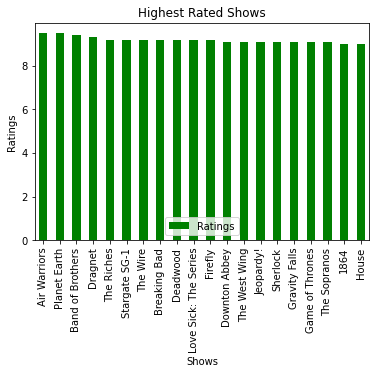

<Figure size 2880x1440 with 0 Axes>

In [12]:
#Question 2 First 20 shows plot

newfirst20_drop.plot(kind="bar", facecolor='green', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Shows")
plt.title("Highest Rated Shows")
plt.figure(figsize=(40,20))
plt.show()

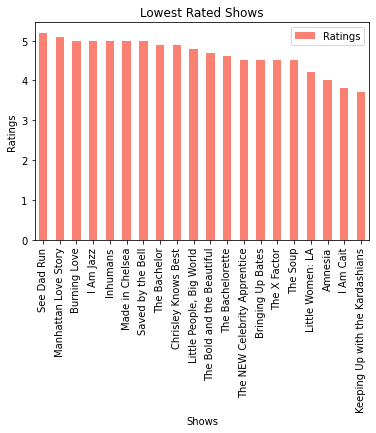

<Figure size 2880x1440 with 0 Axes>

In [13]:
#Question 2 Last 20 Shows plot

newlast20_drop.plot(kind="bar", facecolor='salmon', width=.5)


plt.ylabel("Ratings")
plt.xlabel("Shows")
plt.title("Lowest Rated Shows")
plt.figure(figsize=(40,20))
plt.show()

In [14]:
#create t test

In [15]:
#Question 3
#Which show has the longest running season?
#URL Needed: http://api.tvmaze.com/shows/1/seasons
#end dates will need an except like the networks pull from q1


In [16]:
#Question 4
#Which day of the week has a higher average TV show rating?

## Same URL as Q1 and Q2
#pull day of the week and rating [Schedule][Days][0] (may be multiple days-- will have to troubleshoot)